In [1]:
import kagglehub
path = kagglehub.dataset_download("rounakbanik/ted-talks")
print("Path to dataset files:", path)

100%|██████████| 12.0M/12.0M [00:00<00:00, 94.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3


In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS

In [6]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [7]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3/ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [8]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [9]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [10]:
df.head()

name  \
0      Ken Robinson: Do schools kill creativity?   
1           Al Gore: Averting the climate crisis   
2                  David Pogue: Simplicity sells   
3             Majora Carter: Greening the ghetto   
4  Hans Rosling: The best stats you've ever seen   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                         description   main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...   Ken Robinson   
1  With the same humor and humanity he exuded in ...        Al Gore   
2  New York Times columnist David Pogue takes aim...    David Pogue   
3  In an emotionally charged talk, MacArthur-winn...  Majora Carter   
4  You've never seen data presented like this. Wi...   Hans Rosling   

                     speaker_occupation  num_speaker  duration    event  \
0                       Author/educator            1      1164  TED2006   
1                      Climate advocate            1       977  TED2006   
2                  Technology columnist            1      1286  TED2006   
3    Activist for environmental justice            1      1116  TED2006   
4  Global health expert; data visionary            1      1190  TED2006   

    film_date published_date  comments  \
0  25-02-2006     27-06-2006      4553   
1  25-02-2006     27-06-2006       265   
2  24-02-2006     27-06-2006       124   
3  26-02-2006     27-06-2006       200   
4  22-02-2006     27-06-2006       593   

                                                tags  languages  \
0  ['children', 'creativity', 'culture', 'dance',...         60   
1  ['alternative energy', 'cars', 'climate change...         43   
2  ['computers', 'entertainment', 'interface desi...         26   
3  ['MacArthur grant', 'activism', 'business', 'c...         35   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...         48   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

In [11]:
len(df)

2550

In [12]:
popu_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
popu_talks

title       main_speaker  \
0                           Do schools kill creativity?       Ken Robinson   
1346           Your body language may shape who you are          Amy Cuddy   
677                    How great leaders inspire action        Simon Sinek   
837                          The power of vulnerability        Brené Brown   
452              10 things you didn't know about orgasm         Mary Roach   
1776         How to speak so that people want to listen    Julian Treasure   
201                                My stroke of insight  Jill Bolte Taylor   
5                                  Why we do what we do       Tony Robbins   
2114  This is what happens when you reply to spam email       James Veitch   
1416  Looks aren't everything. Believe me, I'm a model.    Cameron Russell   
500                            The puzzle of motivation           Dan Pink   
1163                            The power of introverts         Susan Cain   
1036                                 How to spot a liar       Pamela Meyer   
2109  What makes a good life? Lessons from the longe...   Robert Waldinger   
1129                    The happy secret to better work        Shawn Achor   

         views   film_date  
0     47227110  25-02-2006  
1346  43155405  26-06-2012  
677   34309432  17-09-2009  
837   31168150  06-06-2010  
452   22270883  06-02-2009  
1776  21594632  10-06-2013  
201   21190883  27-02-2008  
5     20685401  02-02-2006  
2114  20475972  08-12-2015  
1416  19787465  27-10-2012  
500   18830983  24-07-2009  
1163  17629275  28-02-2012  
1036  16861578  13-07-2011  
2109  16601927  14-11-2015  
1129  16209727  11-05-2011

<Axes: xlabel='abbr', ylabel='views'>

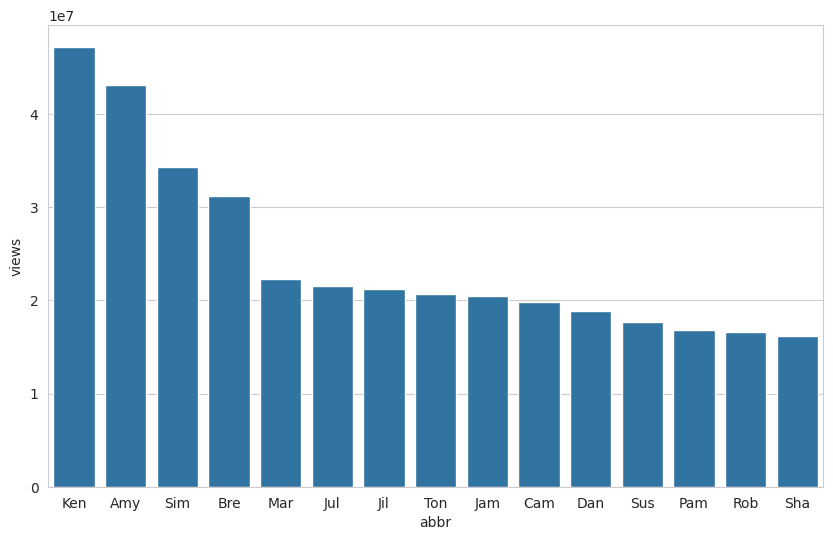

In [15]:
popu_talks['abbr'] = popu_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=popu_talks)

/tmp/ipython-input-16-2837535706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['views'])


<Axes: xlabel='views', ylabel='Density'>

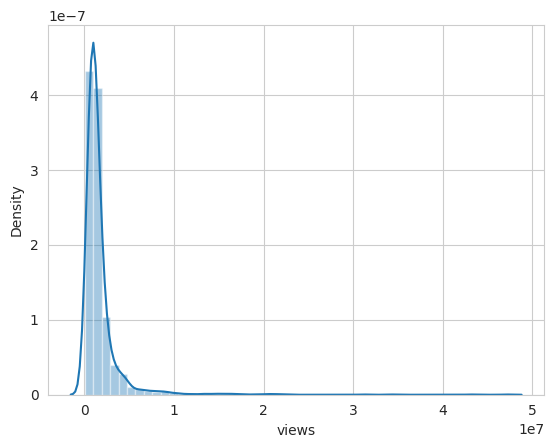

In [16]:
sns.distplot(df['views'])

/tmp/ipython-input-17-2244495089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['views'] < 0.4e7]['views'])


<Axes: xlabel='views', ylabel='Density'>

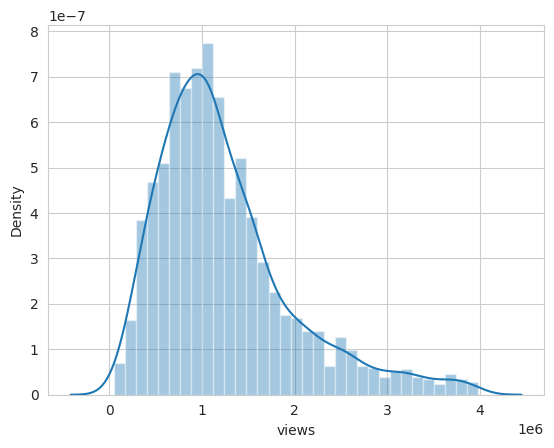

In [17]:
sns.distplot(df[df['views'] < 0.4e7]['views'])

In [18]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [19]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

/tmp/ipython-input-20-114450760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['comments'])


<Axes: xlabel='comments', ylabel='Density'>

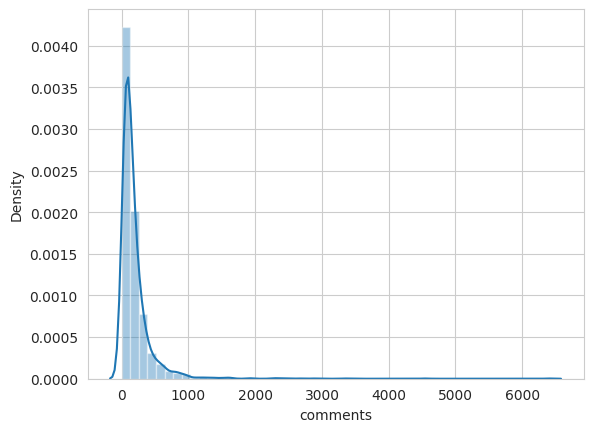

In [20]:
sns.distplot(df['comments'])

/tmp/ipython-input-21-1805041241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['comments'] < 500]['comments'])


<Axes: xlabel='comments', ylabel='Density'>

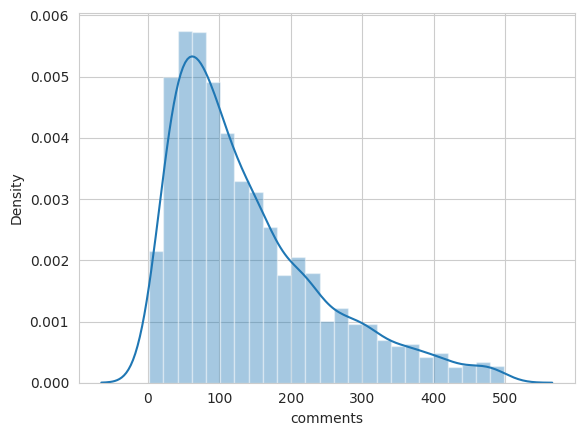

In [21]:
sns.distplot(df[df['comments'] < 500]['comments'])

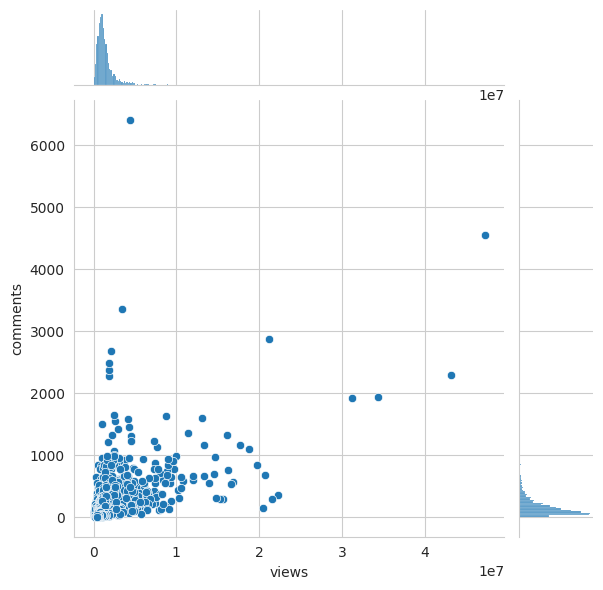

In [22]:
sns.jointplot(x='views', y='comments', data=df)

In [23]:
df[['views', 'comments']].corr()

views  comments
views     1.000000  0.530939
comments  0.530939  1.000000

In [24]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

title       main_speaker     views  \
96                            Militant atheism    Richard Dawkins   4374792   
0                  Do schools kill creativity?       Ken Robinson  47227110   
644         Science can answer moral questions         Sam Harris   3433437   
201                       My stroke of insight  Jill Bolte Taylor  21190883   
1787         How do you explain consciousness?     David Chalmers   2162764   
954               Taking imagination seriously     Janet Echelman   1832930   
840                       On reading the Koran    Lesley Hazleton   1847256   
1346  Your body language may shape who you are          Amy Cuddy  43155405   
661               The danger of science denial    Michael Specter   1838628   
677           How great leaders inspire action        Simon Sinek  34309432   

      comments  
96        6404  
0         4553  
644       3356  
201       2877  
1787      2673  
954       2492  
840       2374  
1346      2290  
661       2272  
677       1930

In [25]:
df['dis_quo'] = df['comments']/df['views']

In [26]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

title           main_speaker    views  \
744        The case for same-sex marriage        Diane J. Savino   292395   
803                E-voting without fraud          David Bismark   543551   
96                       Militant atheism        Richard Dawkins  4374792   
694   Inside a school for suicide bombers  Sharmeen Obaid-Chinoy  1057238   
954          Taking imagination seriously         Janet Echelman  1832930   
840                  On reading the Koran        Lesley Hazleton  1847256   
876          Curating humanity's heritage      Elizabeth Lindsey   439180   
1787    How do you explain consciousness?         David Chalmers  2162764   
661          The danger of science denial        Michael Specter  1838628   
561             Dance to change the world       Mallika Sarabhai   481834   

      comments   dis_quo   film_date  
744        649  0.002220  02-12-2009  
803        834  0.001534  14-07-2010  
96        6404  0.001464  02-02-2002  
694       1502  0.001421  10-02-2010  
954       2492  0.001360  03-03-2011  
840       2374  0.001285  10-10-2010  
876        555  0.001264  08-12-2010  
1787      2673  0.001236  18-03-2014  
661       2272  0.001236  11-02-2010  
561        595  0.001235  04-11-2009

In [27]:
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

<Axes: xlabel='month', ylabel='talks'>

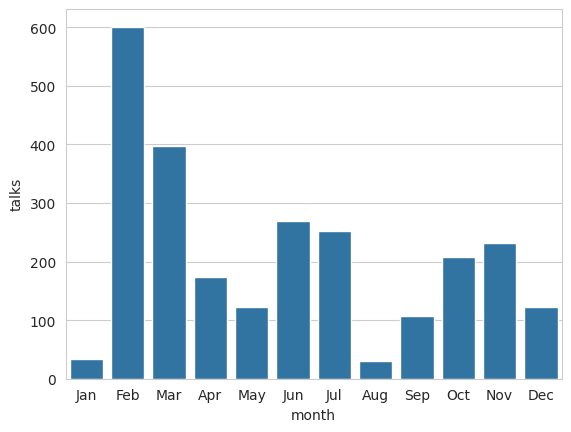

In [28]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [29]:
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

<Axes: xlabel='month', ylabel='talks'>

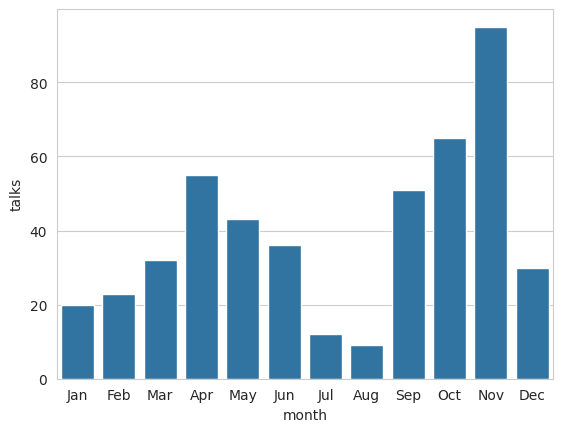

In [30]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

In [31]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [32]:
df['day'] = df['film_date'].apply(getday)

In [33]:
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

<Axes: xlabel='day', ylabel='talks'>

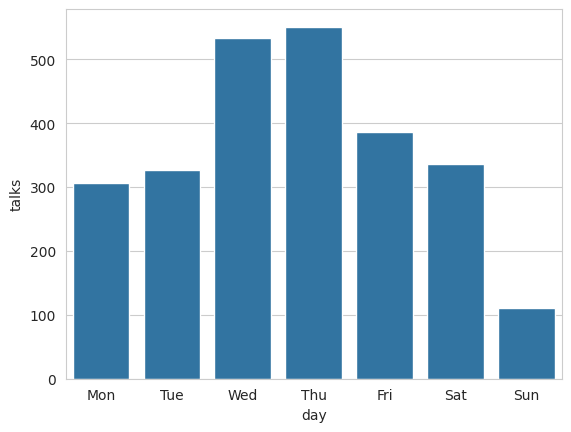

In [34]:
sns.barplot(x='day', y='talks', data=day_df, order=day_order)

In [35]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

<Axes: xlabel='year', ylabel='talks'>

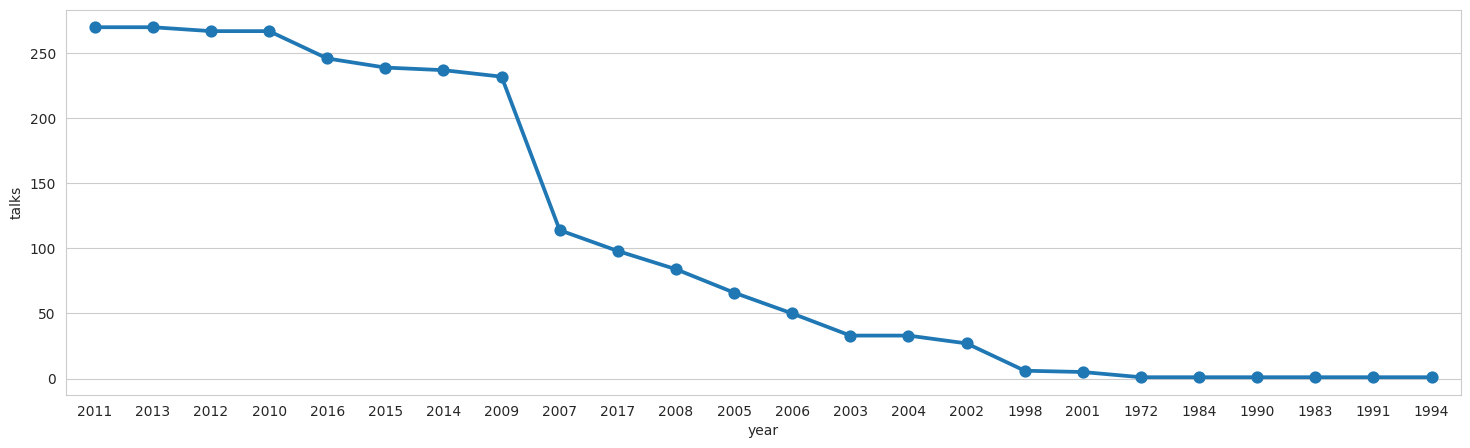

In [36]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

In [37]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [39]:
hmap_df = df.copy()
hmap_df['film_date'] = hmap_df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap_df = pd.pivot_table(hmap_df[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['film_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['film_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'title']]
hmap_df = hmap_df.pivot(index='month_num', columns='year', values='title')
hmap_df = hmap_df.fillna(0)

<Axes: xlabel='year', ylabel='month_num'>

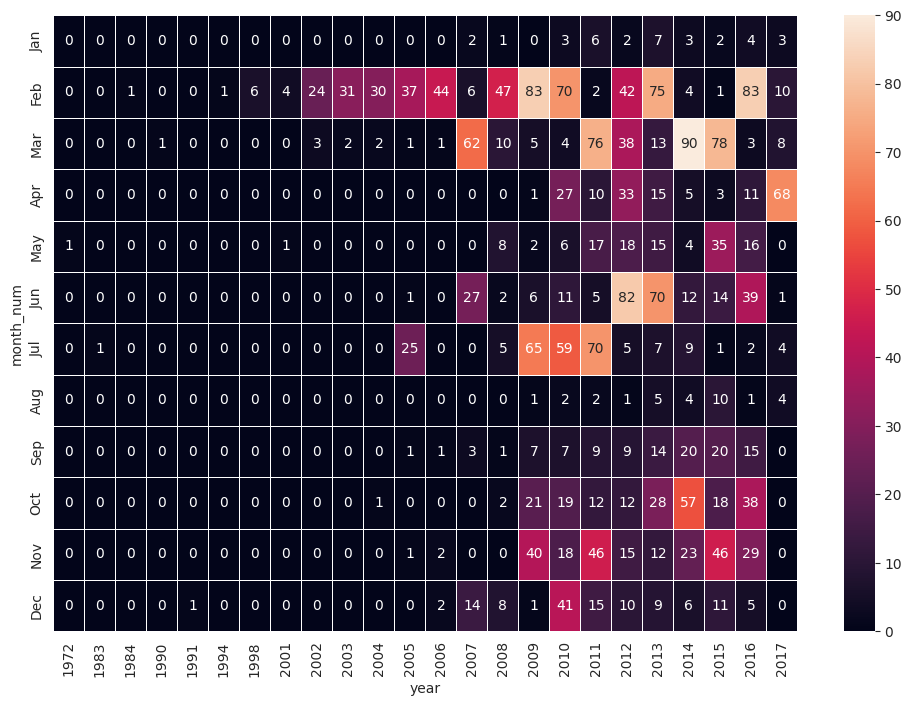

In [40]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_df, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [41]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

main_speaker  appearances
770           Hans Rosling            9
1066         Juan Enriquez            7
1278         Marco Tempest            6
1693                 Rives            6
397            Clay Shirky            5
850   Jacqueline Novogratz            5
424             Dan Ariely            5
248             Bill Gates            5
1075       Julian Treasure            5
1487   Nicholas Negroponte            5

In [42]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

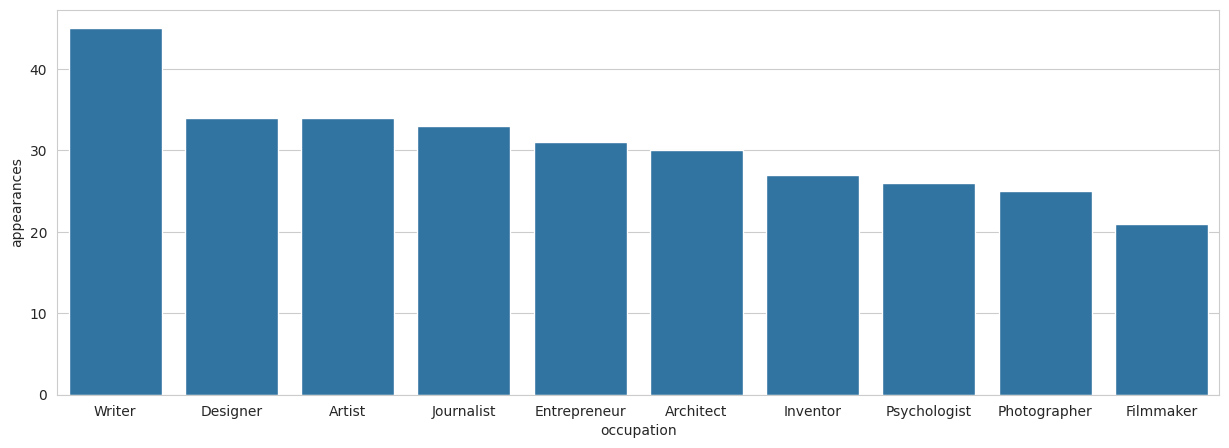

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

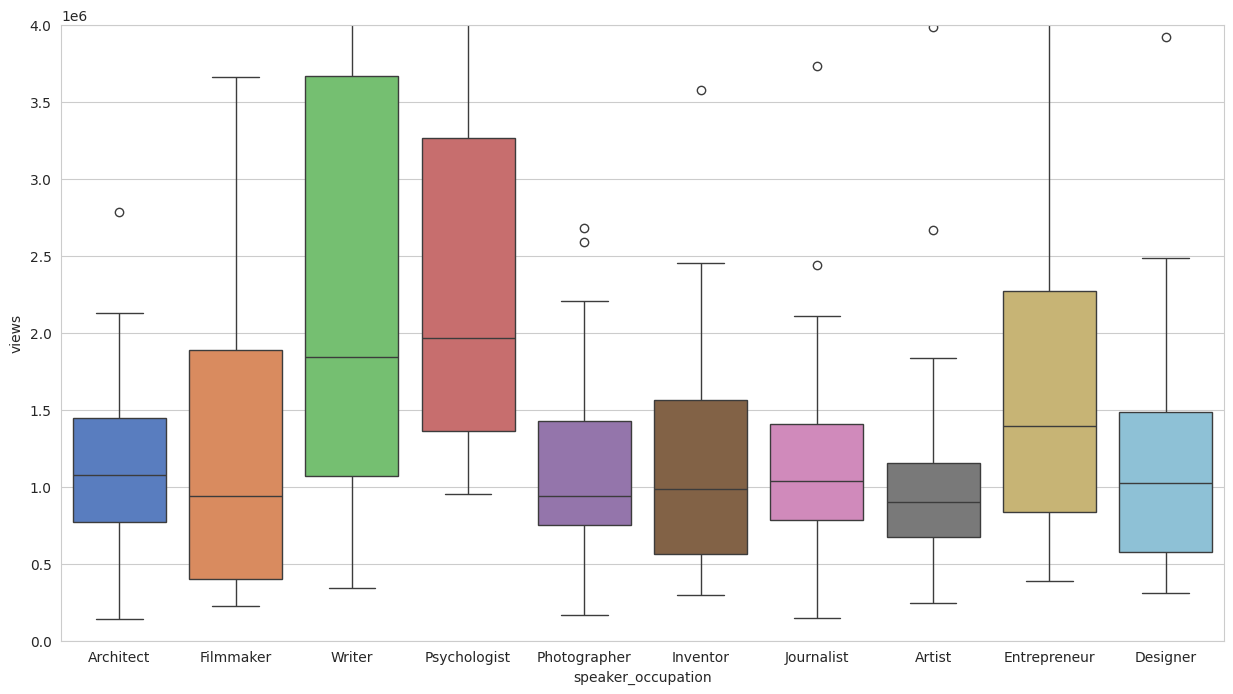

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

In [45]:
df['num_speaker'].value_counts()

num_speaker
1    2492
2      49
3       5
4       3
5       1
Name: count, dtype: int64

In [46]:
df[df['num_speaker'] == 5][['title', 'description', 'main_speaker', 'event']]

title  \
2507  A dance to honor Mother Earth   

                                            description  \
2507  Movement artists Jon Boogz and Lil Buck debut ...   

                main_speaker    event  
2507  Jon Boogz and Lil Buck  TED2017

In [47]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

event  talks
64         TED2014     84
59         TED2009     83
63         TED2013     77
66         TED2016     77
65         TED2015     75
61         TED2011     70
99  TEDGlobal 2012     70
57         TED2007     68
60         TED2010     68
98  TEDGlobal 2011     68

In [48]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [49]:
df[df['languages'] == 72]

name                          title  \
973  Matt Cutts: Try something new for 30 days  Try something new for 30 days   

                                           description main_speaker  \
973  Is there something you've always meant to do, ...   Matt Cutts   

    speaker_occupation  num_speaker  duration    event   film_date  \
973       Technologist            1       207  TED2011  03-03-2011   

    published_date  ...                    tags languages  \
973     01-07-2011  ...  ['culture', 'success']        72   

                                               ratings  \
973  [{'id': 10, 'name': 'Inspiring', 'count': 6171...   

                                         related_talks  \
973  [{'id': 947, 'hero': 'https://pe.tedcdn.com/im...   

                                                   url    views   dis_quo  \
973  https://www.ted.com/talks/matt_cutts_try_somet...  8838874  0.000083   

     month  day  year  
973    Mar  Thu  2011  

[1 rows x 21 columns]

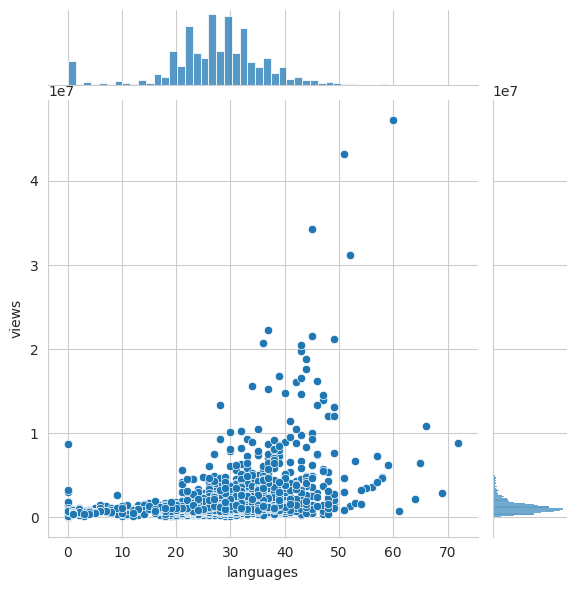

In [50]:
sns.jointplot(x='languages', y='views', data=df)
plt.show()

In [51]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [52]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [53]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

name                        title  \
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   

                                         description  main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   

  speaker_occupation  num_speaker  duration    event   film_date  \
0    Author/educator            1      1164  TED2006  25-02-2006   
0    Author/educator            1      1164  TED2006  25-02-2006   
0    Author/educator            1      1164  TED2006  25-02-2006   
0    Author/educator            1      1164  TED2006  25-02-2006   
0    Author/educator            1      1164  TED2006  25-02-2006   

  published_date  ...  languages  \
0     27-06-2006  ...         60   
0     27-06-2006  ...         60   
0     27-06-2006  ...         60   
0     27-06-2006  ...         60   
0     27-06-2006  ...         60   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   

                                                 url     views   dis_quo  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   

   month  day  year       theme  
0    Feb  Sat  2006    children  
0    Feb  Sat  2006  creativity  
0    Feb  Sat  2006     culture  
0    Feb  Sat  2006       dance  
0    Feb  Sat  2006   education  

[5 rows x 21 columns]

In [54]:
len(theme_df['theme'].value_counts())

416

In [56]:
popu_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
popu_themes.columns = ['theme', 'talks']
popu_themes.head(10)

theme  talks
0     technology    727
1        science    567
2  global issues    501
3        culture    486
4           TEDx    450
5         design    418
6       business    348
7  entertainment    299
8         health    236
9     innovation    229

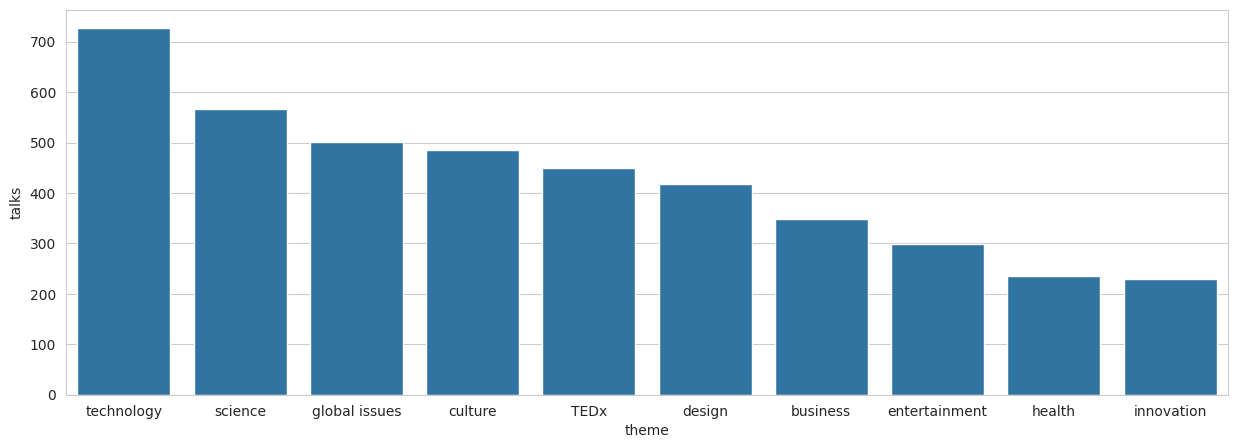

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

In [58]:
popu_theme_talks = theme_df[(theme_df['theme'].isin(popu_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
popu_theme_talks['year'] = popu_theme_talks['year'].astype('int')
popu_theme_talks = popu_theme_talks[popu_theme_talks['year'] > 2008]

/tmp/ipython-input-58-818671670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popu_theme_talks['year'] = popu_theme_talks['year'].astype('int')


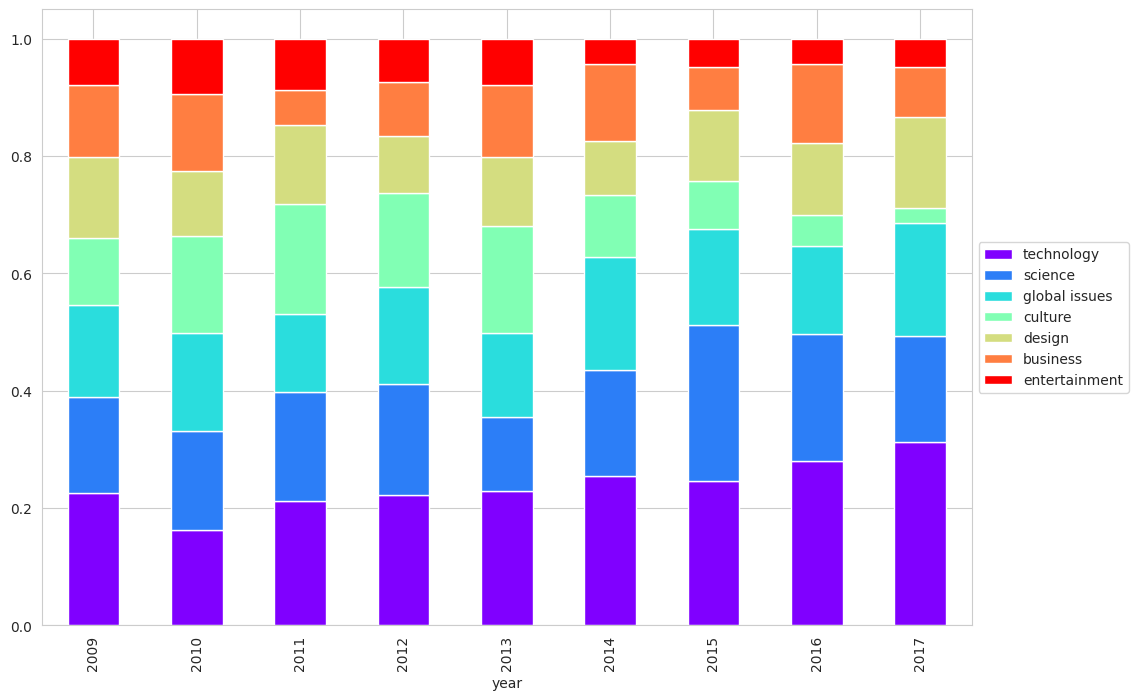

In [60]:
themes = list(popu_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([popu_theme_talks['year']], popu_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

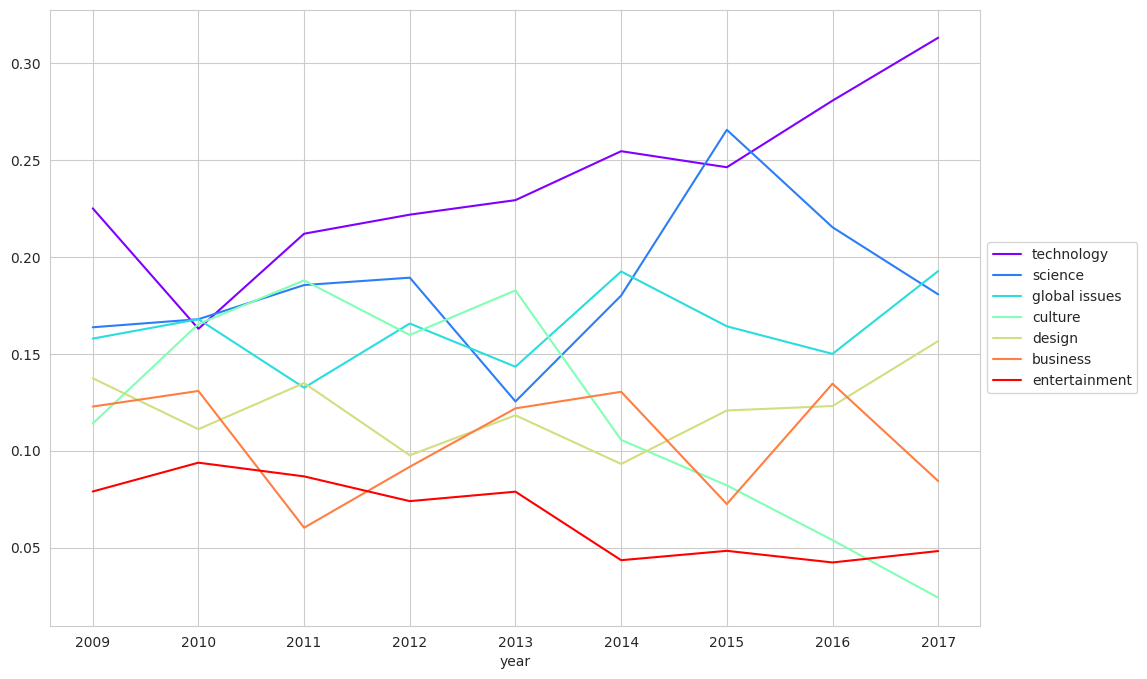

In [61]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

/tmp/ipython-input-62-4288194390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='theme', y='views', data=popu_theme_talks, palette="muted", ax =ax)


(0.0, 4000000.0)

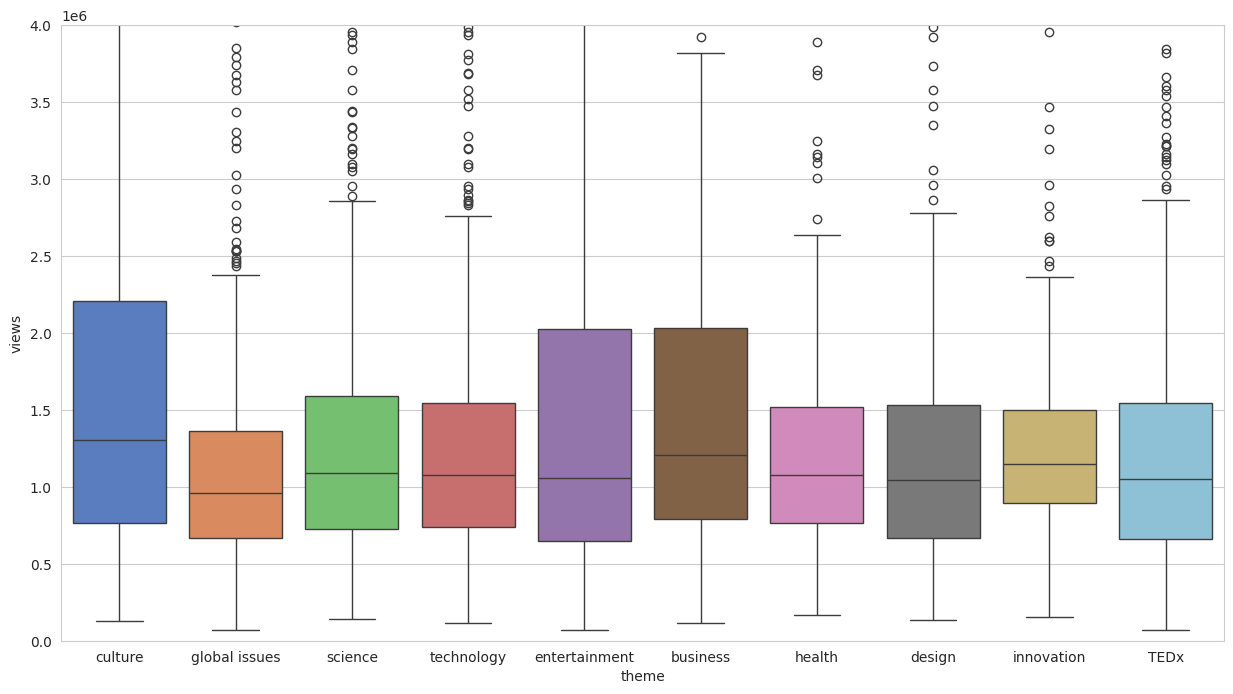

In [62]:
popu_theme_talks = theme_df[theme_df['theme'].isin(popu_themes.head(10)['theme'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='theme', y='views', data=popu_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

In [63]:
df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [64]:
df[df['duration'] == 2.25]

name                     title  \
239  Murray Gell-Mann: The ancestor of language  The ancestor of language   

                                           description      main_speaker  \
239  After speaking at TED2007 on elegance in physi...  Murray Gell-Mann   

    speaker_occupation  num_speaker  duration    event   film_date  \
239          Physicist            1      2.25  TED2007  03-03-2007   

    published_date  ...                                               tags  \
239     11-06-2008  ...  [culture, global issues, history, language, ph...   

    languages                                            ratings  \
239        61  [{'id': 22, 'name': 'Fascinating', 'count': 78...   

                                         related_talks  \
239  [{'id': 161, 'hero': 'https://pe.tedcdn.com/im...   

                                                   url   views   dis_quo  \
239  https://www.ted.com/talks/murray_gell_mann_on_...  785293  0.000097   

     month  day  year  
239    Mar  Sat  2007  

[1 rows x 21 columns]

In [65]:
df[df['duration'] == 87.6]

name  \
640  Douglas Adams: Parrots, the universe and every...   

                                    title  \
640  Parrots, the universe and everything   

                                           description   main_speaker  \
640  Blind river dolphins, reclusive lemurs, a parr...  Douglas Adams   

    speaker_occupation  num_speaker  duration                     event  \
640   Author, satirist            1      87.6  University of California   

      film_date published_date  ...  \
640  16-05-2001     16-03-2010  ...   

                                                  tags languages  \
640  [biodiversity, biology, comedy, humor, life, r...         0   

                                               ratings  \
640  [{'id': 22, 'name': 'Fascinating', 'count': 29...   

                                         related_talks  \
640  [{'id': 635, 'hero': 'https://pe.tedcdn.com/im...   

                                                   url   views   dis_quo  \
640  https://www.ted.com/talks/douglas_adams_parrot...  473220  0.000213   

     month  day  year  
640    May  Wed  2001  

[1 rows x 21 columns]

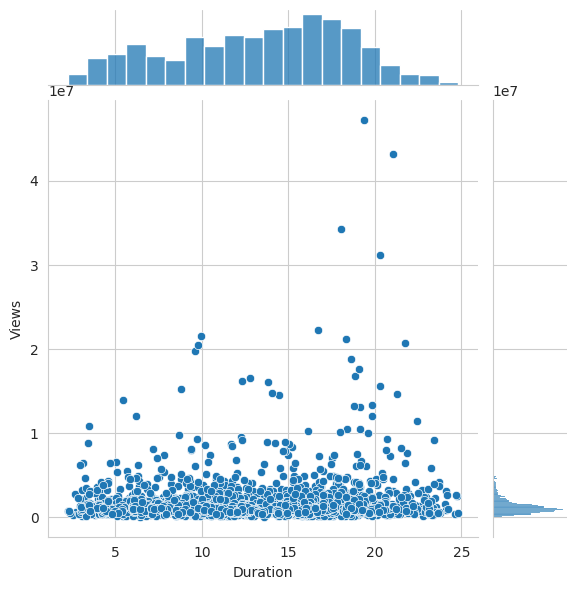

In [66]:
sns.jointplot(x='duration', y='views', data=df[df['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

In [68]:
df2 = pd.read_csv('/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3/transcripts.csv')
df2.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  
0  https://www.ted.com/talks/ken_robinson_says_sc...  
1  https://www.ted.com/talks/al_gore_on_averting_...  
2  https://www.ted.com/talks/david_pogue_says_sim...  
3  https://www.ted.com/talks/majora_carter_s_tale...  
4  https://www.ted.com/talks/hans_rosling_shows_t...

In [69]:
len(df2)

2467

In [70]:
df3 = pd.merge(left=df,right=df2, how='left', left_on='url', right_on='url')
df3.head()

name  \
0      Ken Robinson: Do schools kill creativity?   
1           Al Gore: Averting the climate crisis   
2                  David Pogue: Simplicity sells   
3             Majora Carter: Greening the ghetto   
4  Hans Rosling: The best stats you've ever seen   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                         description   main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...   Ken Robinson   
1  With the same humor and humanity he exuded in ...        Al Gore   
2  New York Times columnist David Pogue takes aim...    David Pogue   
3  In an emotionally charged talk, MacArthur-winn...  Majora Carter   
4  You've never seen data presented like this. Wi...   Hans Rosling   

                     speaker_occupation  num_speaker   duration    event  \
0                       Author/educator            1  19.400000  TED2006   
1                      Climate advocate            1  16.283333  TED2006   
2                  Technology columnist            1  21.433333  TED2006   
3    Activist for environmental justice            1  18.600000  TED2006   
4  Global health expert; data visionary            1  19.833333  TED2006   

    film_date published_date  ...  languages  \
0  25-02-2006     27-06-2006  ...         60   
1  25-02-2006     27-06-2006  ...         43   
2  24-02-2006     27-06-2006  ...         26   
3  26-02-2006     27-06-2006  ...         35   
4  22-02-2006     27-06-2006  ...         48   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                                                 url     views   dis_quo  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  0.000083   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  0.000076   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  0.000118   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869  0.000049   

   month  day  year                                         transcript  
0    Feb  Sat  2006  Good morning. How are you?(Laughter)It's been ...  
1    Feb  Sat  2006  Thank you so much, Chris. And it's truly a gre...  
2    Feb  Fri  2006  (Music: "The Sound of Silence," Simon & Garfun...  
3    Feb  Sun  2006  If you're here today — and I'm very happy that...  
4    Feb  Wed  2006  About 10 years ago, I took on the task to teac...  

[5 rows x 22 columns]

In [71]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x: len(x.split()))

In [72]:
df3['wc'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

In [73]:
df3['wpm'] = df3['wc']/df3['duration']
df3['wpm'].describe()

count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: wpm, dtype: float64

In [74]:
df3[df3['wpm'] > 245]

name  \
441  Mae Jemison: Teach arts and sciences together   

                                title  \
441  Teach arts and sciences together   

                                           description main_speaker  \
441  Mae Jemison is an astronaut, a doctor, an art ...  Mae Jemison   

                                    speaker_occupation  num_speaker  duration  \
441  Astronaut, engineer, entrepreneur, physician a...            1      14.8   

       event   film_date published_date  ...  \
441  TED2002  02-02-2002     05-05-2009  ...   

                                         related_talks  \
441  [{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...   

                                                   url   views   dis_quo  \
441  https://www.ted.com/talks/mae_jemison_on_teach...  744257  0.000133   

    month  day  year                                         transcript    wc  \
441   Feb  Sat  2002  What I want to do today is to spend some time ...  3661   

            wpm  
441  247.364865  

[1 rows x 24 columns]

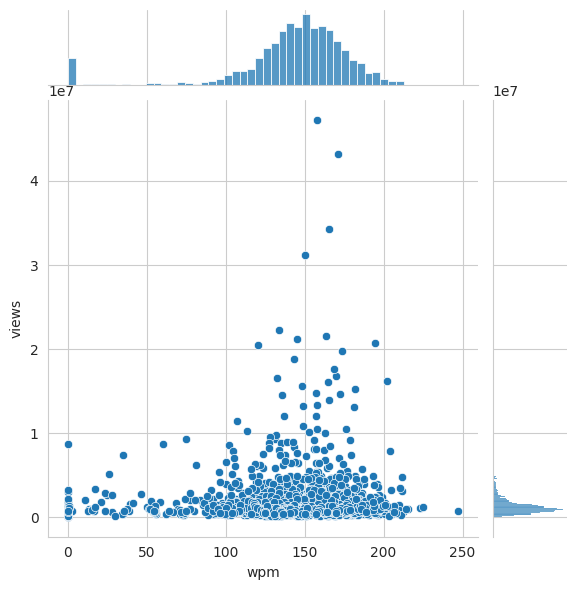

In [75]:
sns.jointplot(x='wpm', y='views', data=df3[df3['duration'] < 25])
plt.show()

In [76]:
df.iloc[1]['ratings']

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [81]:
import json
df['ratings'] = df['ratings'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

In [82]:
df['funny'] = df['ratings'].apply(lambda x: x[0]['count'])
df['jawdrop'] = df['ratings'].apply(lambda x: x[-3]['count'])
df['beautiful'] = df['ratings'].apply(lambda x: x[3]['count'])
df['confusing'] = df['ratings'].apply(lambda x: x[2]['count'])
df.head()

name  \
0      Ken Robinson: Do schools kill creativity?   
1           Al Gore: Averting the climate crisis   
2                  David Pogue: Simplicity sells   
3             Majora Carter: Greening the ghetto   
4  Hans Rosling: The best stats you've ever seen   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                         description   main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...   Ken Robinson   
1  With the same humor and humanity he exuded in ...        Al Gore   
2  New York Times columnist David Pogue takes aim...    David Pogue   
3  In an emotionally charged talk, MacArthur-winn...  Majora Carter   
4  You've never seen data presented like this. Wi...   Hans Rosling   

                     speaker_occupation  num_speaker   duration    event  \
0                       Author/educator            1  19.400000  TED2006   
1                      Climate advocate            1  16.283333  TED2006   
2                  Technology columnist            1  21.433333  TED2006   
3    Activist for environmental justice            1  18.600000  TED2006   
4  Global health expert; data visionary            1  19.833333  TED2006   

    film_date published_date  ...  \
0  25-02-2006     27-06-2006  ...   
1  25-02-2006     27-06-2006  ...   
2  24-02-2006     27-06-2006  ...   
3  26-02-2006     27-06-2006  ...   
4  22-02-2006     27-06-2006  ...   

                                                 url     views   dis_quo  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  0.000096   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  0.000083   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  0.000076   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  0.000118   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869  0.000049   

  month  day  year  funny  jawdrop beautiful confusing  
0   Feb  Sat  2006  19645     1174      3253      6073  
1   Feb  Sat  2006    544      116        58        62  
2   Feb  Fri  2006    964      230        60       183  
3   Feb  Sun  2006    760      230        59        32  
4   Feb  Wed  2006   3202     2542       318       942  

[5 rows x 25 columns]

In [83]:
df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:10]

title       main_speaker  \
837                          The power of vulnerability        Brené Brown   
0                           Do schools kill creativity?       Ken Robinson   
1030                         How to live before you die         Steve Jobs   
201                                My stroke of insight  Jill Bolte Taylor   
1129                    The happy secret to better work        Shawn Achor   
1940                                 The price of shame    Monica Lewinsky   
2109  What makes a good life? Lessons from the longe...   Robert Waldinger   
1747                Why good leaders make you feel safe        Simon Sinek   
553    The thrilling potential of SixthSense technology      Pranav Mistry   
176                            Underwater astonishments        David Gallo   

         views published_date  funny  
837   31168150     23-12-2010  21444  
0     47227110     27-06-2006  19645  
1030   8744428     06-10-2011  17290  
201   21190883     12-03-2008  14447  
1129  16209727     01-02-2012  11213  
1940  11443190     20-03-2015   8668  
2109  16601927     23-12-2015   8590  
1747   6803938     19-05-2014   8569  
553   16097077     16-11-2009   8416  
176   13926113     11-01-2008   8328

In [84]:
df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False)[:10]

title       main_speaker  \
201                               My stroke of insight  Jill Bolte Taylor   
677                   How great leaders inspire action        Simon Sinek   
381                       Your elusive creative genius  Elizabeth Gilbert   
2161        Inside the mind of a master procrastinator          Tim Urban   
1129                   The happy secret to better work        Shawn Achor   
1779   Which country does the most good for the world?       Simon Anholt   
1346          Your body language may shape who you are          Amy Cuddy   
500                           The puzzle of motivation           Dan Pink   
614                       Teach every child about food       Jamie Oliver   
553   The thrilling potential of SixthSense technology      Pranav Mistry   

         views published_date  beautiful  
201   21190883     12-03-2008       9437  
677   34309432     04-05-2010       8845  
381   13155478     09-02-2009       8130  
2161  14745406     15-03-2016       7445  
1129  16209727     01-02-2012       7315  
1779   4548276     02-07-2014       6390  
1346  43155405     01-10-2012       6217  
500   18830983     24-08-2009       4797  
614    7638978     11-02-2010       4779  
553   16097077     16-11-2009       4702

In [85]:
df[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending=False)[:10]

title       main_speaker     views  \
4              The best stats you've ever seen       Hans Rosling  12005869   
1163                   The power of introverts         Susan Cain  17629275   
381               Your elusive creative genius  Elizabeth Gilbert  13155478   
1030                How to live before you die         Steve Jobs   8744428   
0                  Do schools kill creativity?       Ken Robinson  47227110   
677           How great leaders inspire action        Simon Sinek  34309432   
29         The surprising science of happiness        Dan Gilbert  14689301   
117                    New insights on poverty       Hans Rosling   3243784   
500                   The puzzle of motivation           Dan Pink  18830983   
1170  Why you will fail to have a great career        Larry Smith   5917201   

     published_date  jawdrop  
4        27-06-2006     2542  
1163     02-03-2012     2467  
381      09-02-2009     2093  
1030     06-10-2011     1368  
0        27-06-2006     1174  
677      04-05-2010     1161  
29       26-09-2006     1047  
117      25-06-2007      828  
500      24-08-2009      825  
1170     11-03-2012      752

In [86]:
df[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:10]

title       main_speaker  \
1346     Your body language may shape who you are          Amy Cuddy   
201                          My stroke of insight  Jill Bolte Taylor   
1163                      The power of introverts         Susan Cain   
246   The transformative power of classical music    Benjamin Zander   
837                    The power of vulnerability        Brené Brown   
972                    Building a park in the sky     Robert Hammond   
0                     Do schools kill creativity?       Ken Robinson   
919     3 things I learned while my plane crashed          Ric Elias   
176                      Underwater astonishments        David Gallo   
1776   How to speak so that people want to listen    Julian Treasure   

         views published_date  confusing  
1346  43155405     01-10-2012      11111  
201   21190883     12-03-2008      10464  
1163  17629275     02-03-2012      10218  
246    9315483     25-06-2008       8108  
837   31168150     23-12-2010       7942  
972     704205     30-06-2011       6685  
0     47227110     27-06-2006       6073  
919    6636475     22-04-2011       5834  
176   13926113     11-01-2008       5201  
1776  21594632     27-06-2014       5167

In [87]:
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))

In [88]:
s = df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [89]:
related_df = df.drop('related_talks', axis=1).join(s)
related_df['related'] = related_df['related'].apply(lambda x: x['title'])

In [90]:
d = dict(related_df['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [91]:
related_df['title'] = related_df['title'].apply(lambda x: d[x])
related_df['related'] = related_df['related'].apply(lambda x: d[x])

In [92]:
related_df = related_df[['title', 'related']]
related_df.head()

title  related
0      0      692
0      0     1502
0      0     1991
0      0      715
0      0     1023

In [93]:
edges = list(zip(related_df['title'], related_df['related']))

In [94]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

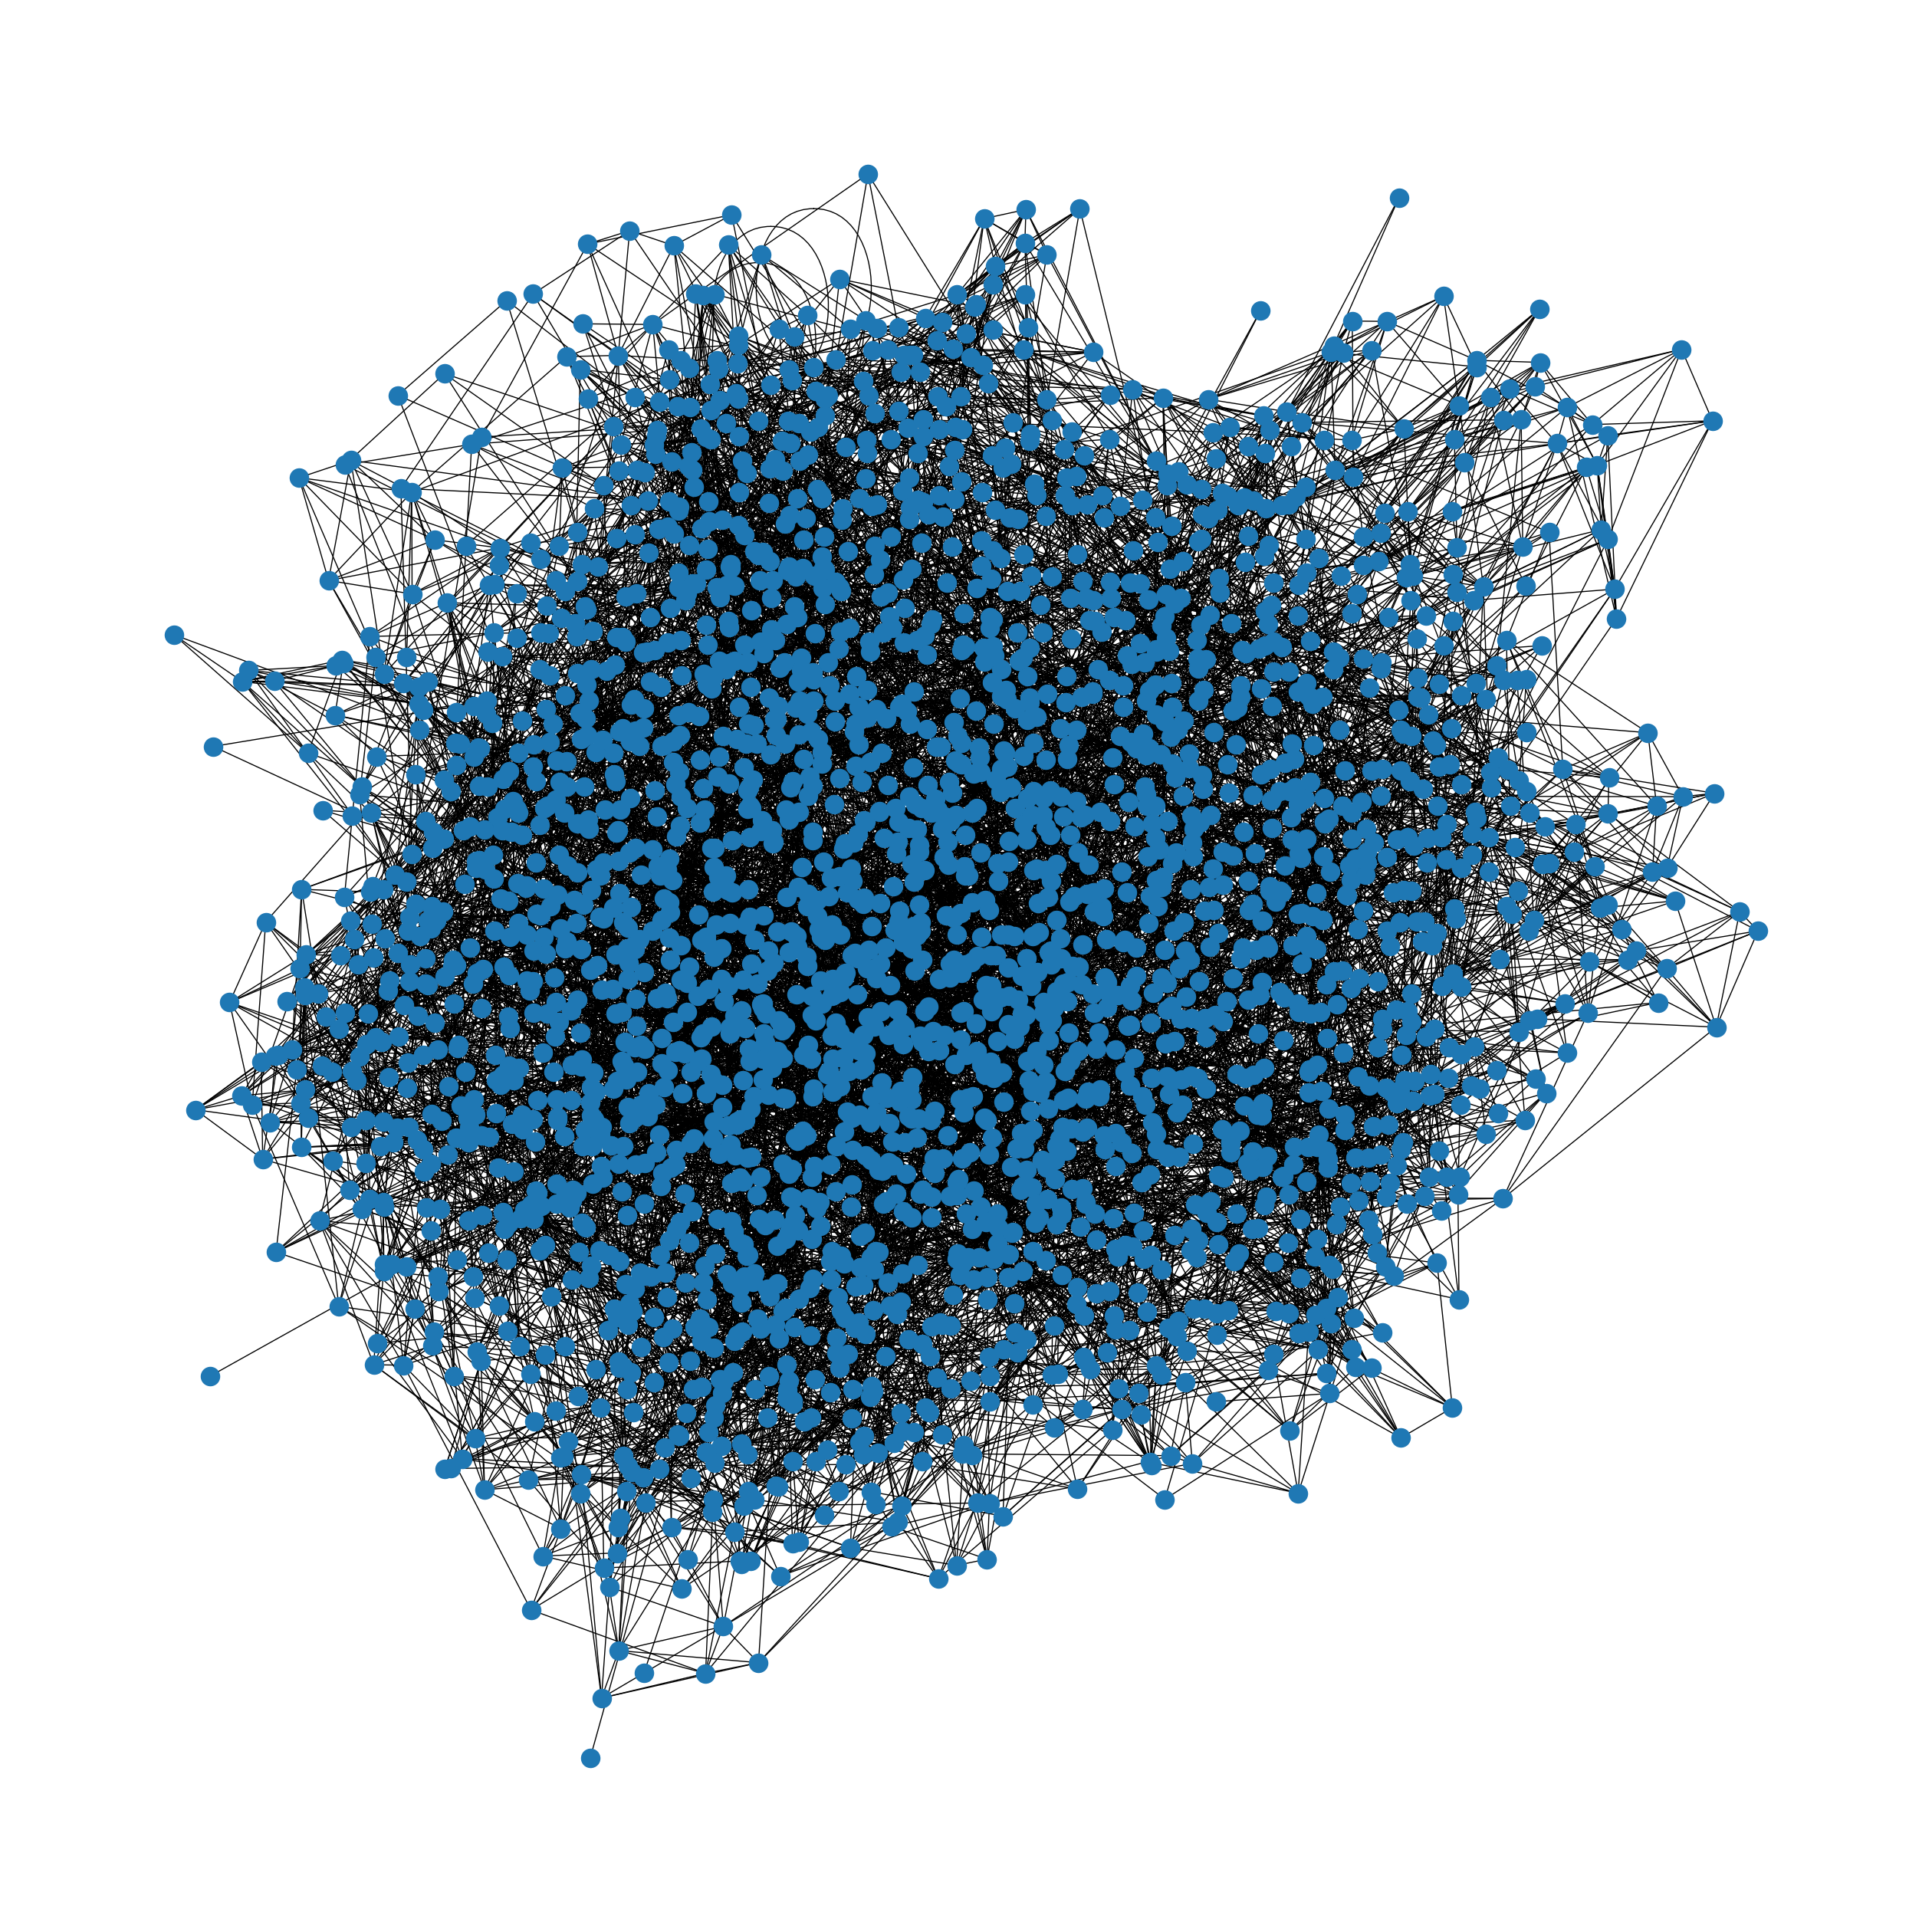

In [95]:
plt.figure(figsize=(25, 25))
nx.draw(G, with_labels=False)

In [96]:
corpus = ' '.join(df2['transcript'])
corpus = corpus.replace('.', '. ')

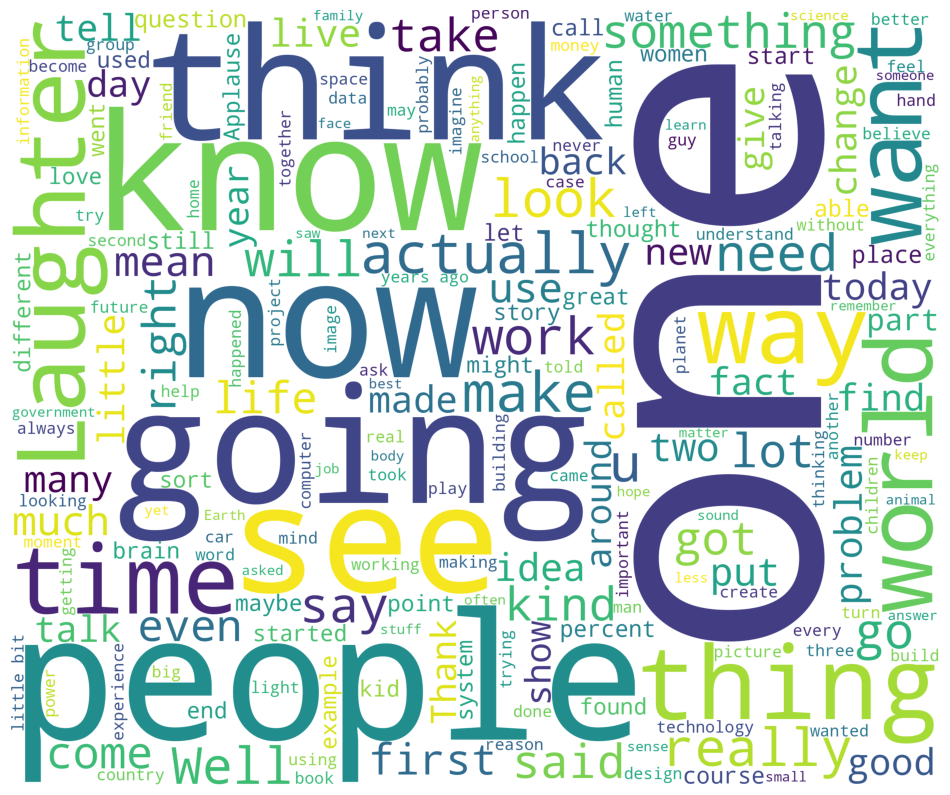

In [97]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()